In [40]:
# call in needed modules
import os 
import pandas as pd
import numpy as np

In [41]:
print("Current Working Directory",os.getcwd())

Current Working Directory D:\ADV ANALYTICS PROJECT


In [42]:
# setting new directory to seagate hardrive
os.chdir("D:\ADV ANALYTICS PROJECT")

In [43]:
# read in data
vios = pd.read_excel('Data.xlsx',sheet_name='Clean Data')
print(vios.dtypes)

Complaint Number                              int64
Previous ECB#                                object
ECB #                                        object
License# Rep                                 object
Respondent                                   object
I_CODE                                       object
Section of Law                               object
Violation Description                        object
New I_CODE                                   object
Complaint Reason                             object
Inspection Date                      datetime64[ns]
BIN Number                                    int64
Complaint  Category                          object
Complaint  Category Description              object
Complaint  Sub Category 1                     int64
1st Unit Assigned Description                object
Disposition Date                     datetime64[ns]
Disposition Code                             object
Complaint Disposition Description            object
Inspector ID

In [44]:
# divide data into training and testing set
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(vios, test_size=0.2, random_state=42)

In [45]:
test_set.head()

,Complaint Number,Previous ECB#,ECB #,License# Rep,Respondent,I_CODE,Section of Law,Violation Description,New I_CODE,Complaint Reason,Inspection Date,BIN Number,Complaint Category,Complaint Category Description,Complaint Sub Category 1,1st Unit Assigned Description,Disposition Date,Disposition Code,Complaint Disposition Description,Inspector ID
834,3723576,NaN,NaN,NaN,NaN,119,BC3301.3 3310.5,Failure to designate and/or have Site Safety M...,119,"FAILURE TO PROVIDE CS AT JOBSITE, FAILURE TO P...",2019-09-26,3005226,8A,CONSTRUCTION SAFETY COMPLIANCE ACTION,2,CONSTRUCTION SAFETY COMPLIANCE,2019-09-27,A3,FULL STOP WORK ORDER SERVED ...,3047
1509,2289440,35455816L,35455816L,GC617880,CROSS TOWN CONTRACTOR,206,AC 27MISCAC28MISCBCMI,Miscellaneous violations.,210,NO SSP. NO ORIENTATION REPORT,2019-09-26,2089845,8A,CONSTRUCTION SAFETY COMPLIANCE ACTION,2,CONSTRUCTION SAFETY COMPLIANCE,2019-09-27,A3,FULL STOP WORK ORDER SERVED ...,2783
100,3687783,35386077K,35386077K,GC37139,KAIETEUR CONSTRUCTION INC,106,AC 27MISCAC28MISCBCMI,Miscellaneous violations.,109,NO ROOF OR OVERHEAD PROTECTION PROVIDED FOR AD...,2019-02-21,3425802,8A,CONSTRUCTION SAFETY COMPLIANCE ACTION,2,CONSTRUCTION SAFETY COMPLIANCE,2019-02-22,L1,PARTIAL STOP WORK ORDER ...,2958
1844,1515825,35441343N,35441343N,GC612573,ALBA SERVICES INC,1F2,BC3301.7(2014 CODE),Failure to maintain/display on site documents ...,1F2,SUPPORTED SCAFF NOT IN CODE COMPLIANCE / NO I...,2019-07-05,1015283,8A,CONSTRUCTION SAFETY COMPLIANCE ACTION,2,CONSTRUCTION SAFETY COMPLIANCE,2019-07-12,L1,PARTIAL STOP WORK ORDER ...,2868
56,3724107,35455987X,35455987X,GC601810,JAN-POL INC,106,AC 27MISCAC28MISCBCMI,Miscellaneous violations.,109,FAIL TO ADEQUATELY PROTECT ADJ PROPERTY DURING...,2019-09-27,3060768,8A,CONSTRUCTION SAFETY COMPLIANCE ACTION,2,CONSTRUCTION SAFETY COMPLIANCE,2019-10-01,L1,PARTIAL STOP WORK ORDER ...,2774


In [47]:
# explore your training set
training_set.info()
training_set.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 1375 to 860
Data columns (total 20 columns):
Complaint Number                     1898 non-null int64
Previous ECB#                        1399 non-null object
ECB #                                1399 non-null object
License# Rep                         1272 non-null object
Respondent                           1272 non-null object
I_CODE                               1898 non-null object
Section of Law                       1898 non-null object
Violation Description                1898 non-null object
New I_CODE                           1898 non-null object
Complaint Reason                     1898 non-null object
Inspection Date                      1898 non-null datetime64[ns]
BIN Number                           1898 non-null int64
Complaint  Category                  1898 non-null object
Complaint  Category Description      1898 non-null object
Complaint  Sub Category 1            1898 non-null int64
1st Unit Assigne

,Complaint Number,BIN Number,Complaint Sub Category 1,Inspector ID
count,1.898000e+03,1.898000e+03,1898.000000,1898.000000
mean,3.197094e+06,2.756682e+06,2.263962,2964.129083
std,1.248924e+06,1.254179e+06,0.598168,121.413107
min,1.501694e+06,1.000027e+06,1.000000,2232.000000
25%,1.528663e+06,1.090418e+06,2.000000,2879.000000
50%,3.700449e+06,3.064408e+06,2.000000,2987.000000
75%,3.731128e+06,3.426550e+06,3.000000,3050.000000
max,5.145571e+06,5.820823e+06,4.000000,3163.000000


In [55]:
# clean data for missing values; removing columns
print(training_set.isna().sum())
vios_training = training_set.drop(['Previous ECB#','ECB #','License# Rep','Respondent'],axis=1)
vios_training.head()
vios_training.isna().sum()

Complaint Number                       0
Previous ECB#                        499
ECB #                                499
License# Rep                         626
Respondent                           626
I_CODE                                 0
Section of Law                         0
Violation Description                  0
New I_CODE                             0
Complaint Reason                       0
Inspection Date                        0
BIN Number                             0
Complaint  Category                    0
Complaint  Category Description        0
Complaint  Sub Category 1              0
1st Unit Assigned Description          0
Disposition Date                       0
Disposition Code                       0
Complaint Disposition Description      0
Inspector ID                           0
dtype: int64


Complaint Number                     0
I_CODE                               0
Section of Law                       0
Violation Description                0
New I_CODE                           0
Complaint Reason                     0
Inspection Date                      0
BIN Number                           0
Complaint  Category                  0
Complaint  Category Description      0
Complaint  Sub Category 1            0
1st Unit Assigned Description        0
Disposition Date                     0
Disposition Code                     0
Complaint Disposition Description    0
Inspector ID                         0
dtype: int64

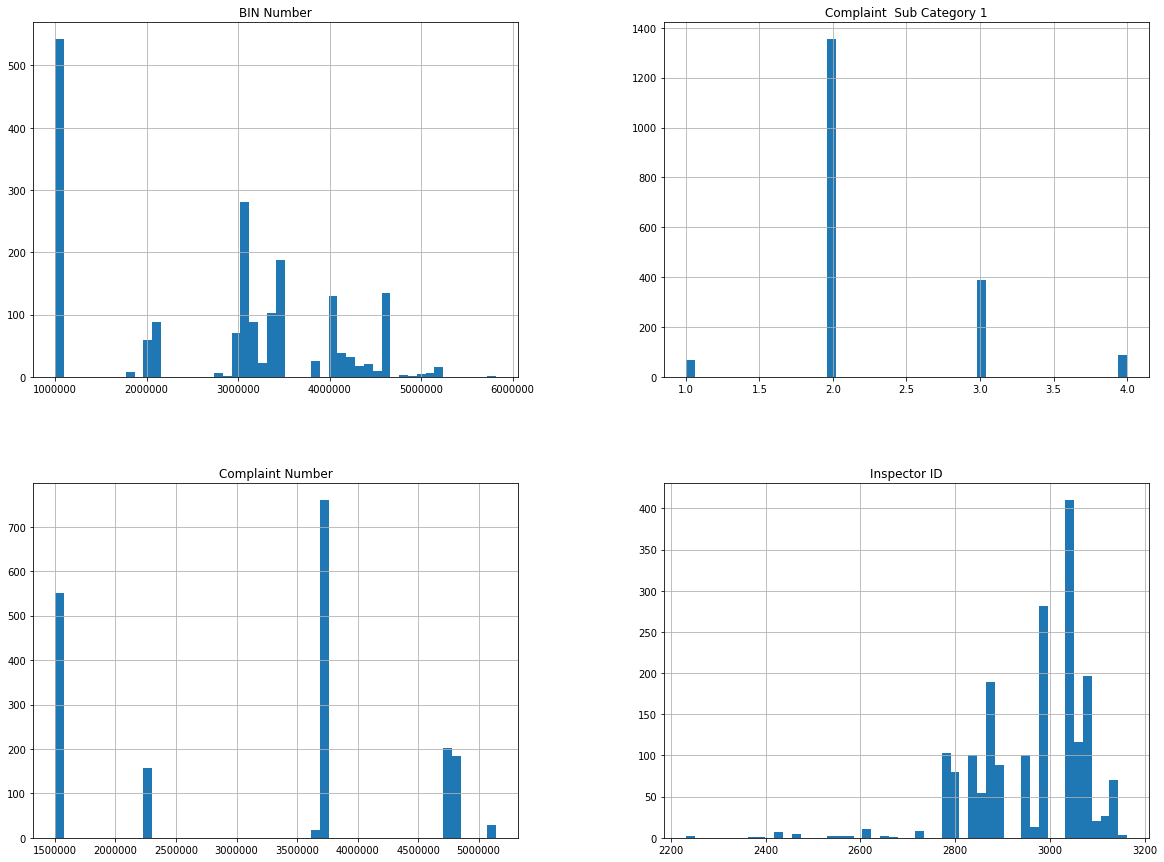

In [57]:
# visualize the data in your training set
# histograms only show for int data types
%matplotlib inline
import matplotlib.pyplot as plt
vios_training.style.use('ggplot')
vios_training.hist(bins=50, figsize=(20,15))
plt.show()

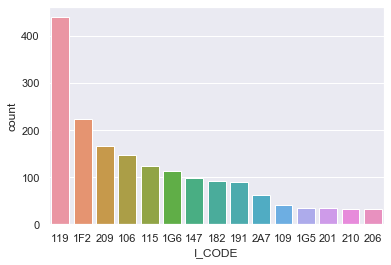

<Figure size 2160x1440 with 0 Axes>

In [120]:
# histograms for categorical data types; I_CODE
import seaborn as sns
sns.set(style="darkgrid")
inf = sns.countplot(x="I_CODE",data=vios_training,
                   order=vios_training["I_CODE"].value_counts().iloc[:15].index)
plt.figure(figsize=(30,20))
plt.show()

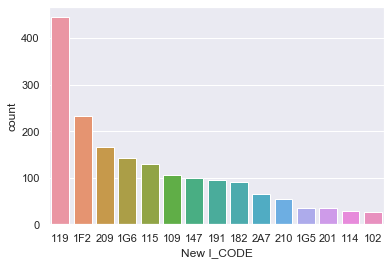

<Figure size 864x576 with 0 Axes>

In [119]:
# histogram of categorical data types; New I_CODE
%matplotlib inline
ninf = sns.countplot(x="New I_CODE",data=vios_training,
                    order=vios_training["New I_CODE"].value_counts().iloc[:15].index)
plt.figure(figsize=(12,8))
plt.show()

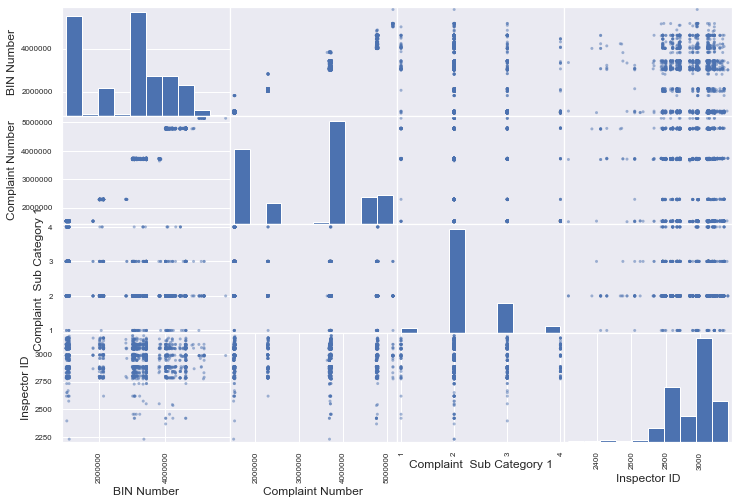

In [91]:
# scatter matrix for data types ints; not meaningful
from pandas.plotting import scatter_matrix
attributes = ["BIN Number", "Complaint Number", "Complaint  Sub Category 1","Inspector ID"]
scatter_matrix(vios_training[attributes],figsize=(12,8))
plt.show()

In [131]:
# viewing counts of I_CODE
vios_tab = pd.crosstab(index=vios_training["I_CODE"],
                      columns="count")
vios_tab.iloc[1:15] # shorten to see 15 values

col_0,count
I_CODE,
102,26
106,148
109,40
110,8
114,2
115,123
119,440
121,7
123,2


In [133]:
# viewing counts of New I_CODE
nvios_tab = pd.crosstab(index=vios_training["New I_CODE"],
                      columns="count")
nvios_tab.iloc[1:15] # shorten to see 15 values

col_0,count
New I_CODE,
102,26
109,105
110,8
114,28
115,130
119,445
121,7
123,2
129,1


In [138]:
# two-way table for infractions
grouped = vios_training.groupby(['New I_CODE','I_CODE'])
grouped.size().iloc[1:15] #shorten it to see 15 values

New I_CODE  I_CODE
101         106         1
102         102        26
109         106        51
            109        40
            206        13
            279         1
110         110         8
114         106        21
            114         2
            147         1
            206         4
115         106         1
            115       121
            147         3
dtype: int64

In [141]:
new_old_tab = pd.crosstab(index=vios_training["I_CODE"],
                         columns=vios_training["New I_CODE"])
new_old_tab.iloc[1:15] #shorten to show 15 values

New I_CODE,101,102,109,110,114,115,119,121,123,129,...,1G5,1G6,1K5,1K6,2A7,2F1,2F7,2G5,2G6,2K8
I_CODE,,,,,,,,,,,,,,,,,,,,,
102,0,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,1,0,51,0,21,1,8,0,0,0,...,0,16,2,0,2,0,0,0,0,0
109,0,0,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,121,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
119,0,0,0,0,0,0,437,0,0,0,...,0,3,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


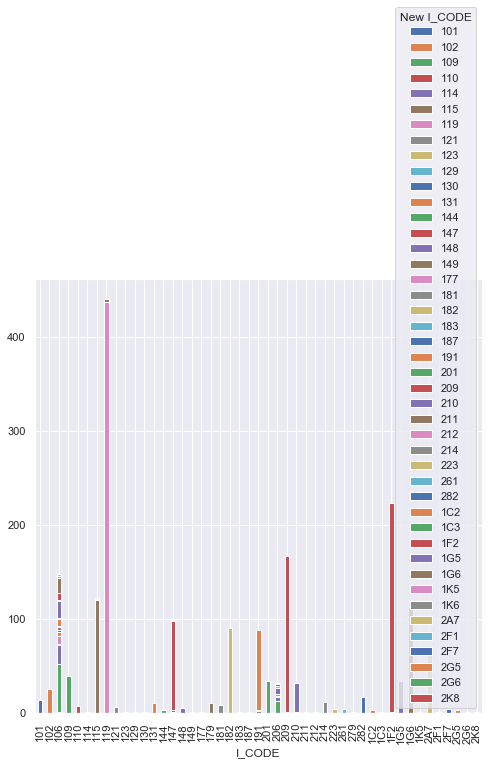

In [143]:
new_old_tab.plot(kind="bar",figsize=(8,8),stacked=True)
# looks awful, really congested bar graph

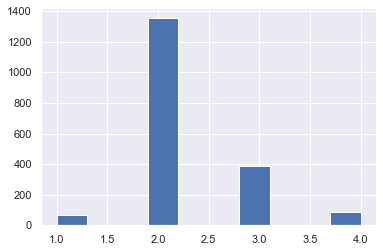

In [152]:
# apply transformations to complaint sub cat(**2, **3, log, exp)
plt.hist(vios_training['Complaint  Sub Category 1'].values.reshape(-1,1))
plt.show()

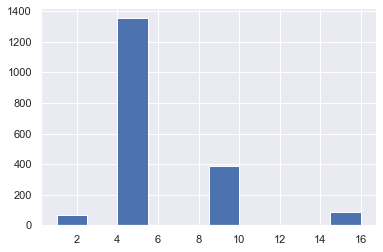

In [154]:
# squaring (**2)
plt.hist(vios_training['Complaint  Sub Category 1'].values.reshape(-1,1)**2)
plt.show()

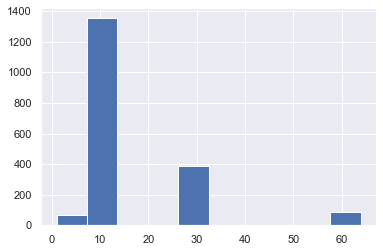

In [156]:
# cubing (**3)
plt.hist(vios_training['Complaint  Sub Category 1'].values.reshape(-1,1)**3)
plt.show()

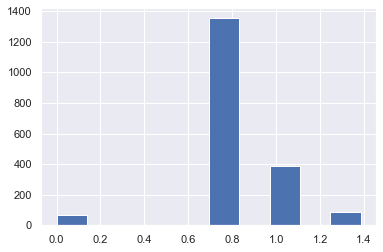

In [157]:
# log
plt.hist(np.log(vios_training['Complaint  Sub Category 1'].values.reshape(-1,1)))
plt.show()

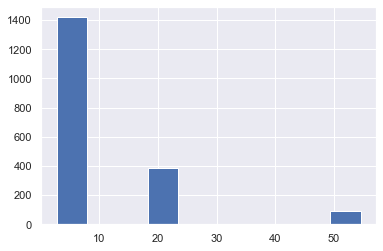

In [158]:
# exponential
plt.hist(np.exp(vios_training['Complaint  Sub Category 1'].values.reshape(-1,1)))
plt.show()

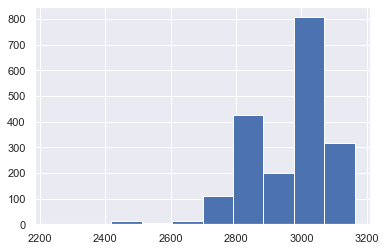

In [153]:
# apply transformations to vios
plt.hist(vios_training['Inspector ID'].values.reshape(-1,1))
plt.show()

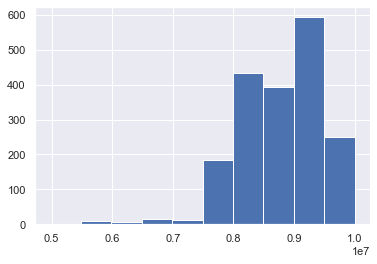

In [155]:
# squaring (**2)
plt.hist(vios_training['Inspector ID'].values.reshape(-1,1)**2)
plt.show()

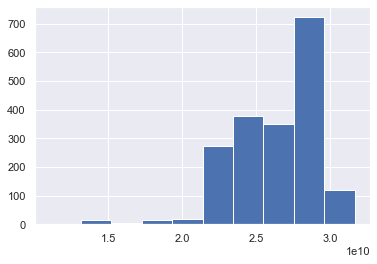

In [159]:
# cubing (**3)
plt.hist(vios_training['Inspector ID'].values.reshape(-1,1)**3)
plt.show()

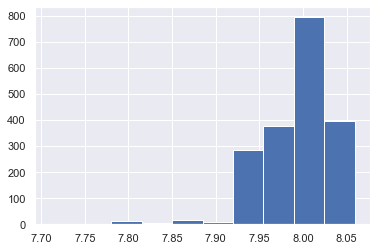

In [163]:
# log
plt.hist(np.log(vios_training['Inspector ID'].values.reshape(-1,1)))
plt.show()

ValueError: supplied range of [inf, inf] is not finite

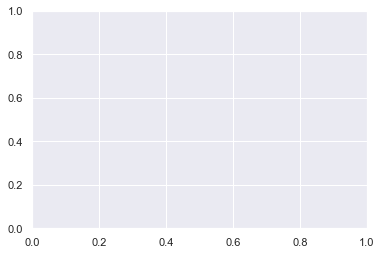

In [168]:
# exp - ends up in ValueError
plt.hist(np.exp(vios_training['Inspector ID'].values.reshape(-1,1)))
plt.show()

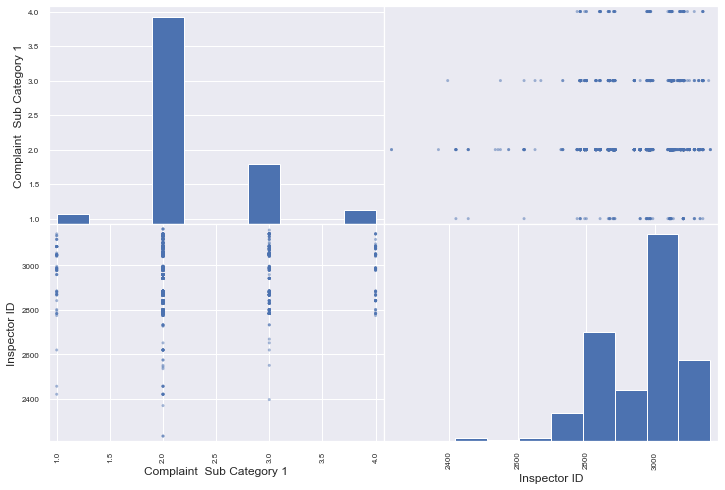

In [172]:
# scatter matrix for the original data for Complaint Sub Category and Inspector ID
attributes = ["Complaint  Sub Category 1","Inspector ID"]
scatter_matrix(vios_training[attributes], figsize=(12, 8))
plt.show()

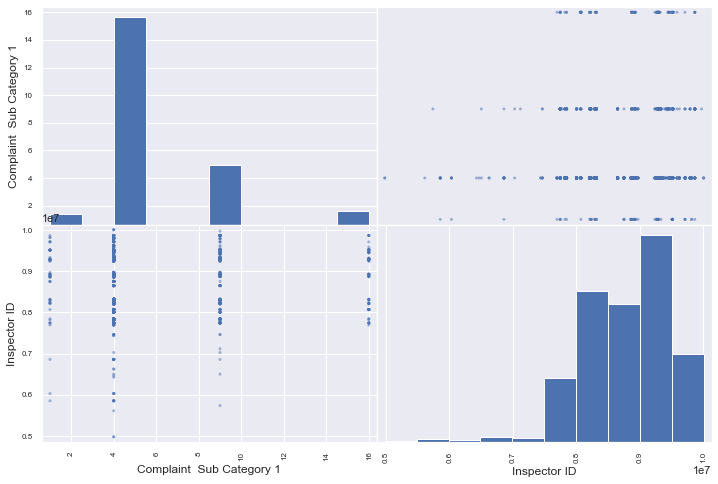

In [171]:
# scatter matrix for the squared data for Complaint Sub Category and Inspector ID
attributes = ["Complaint  Sub Category 1","Inspector ID"]
scatter_matrix(vios_training[attributes]**2, figsize=(12, 8))
plt.show()

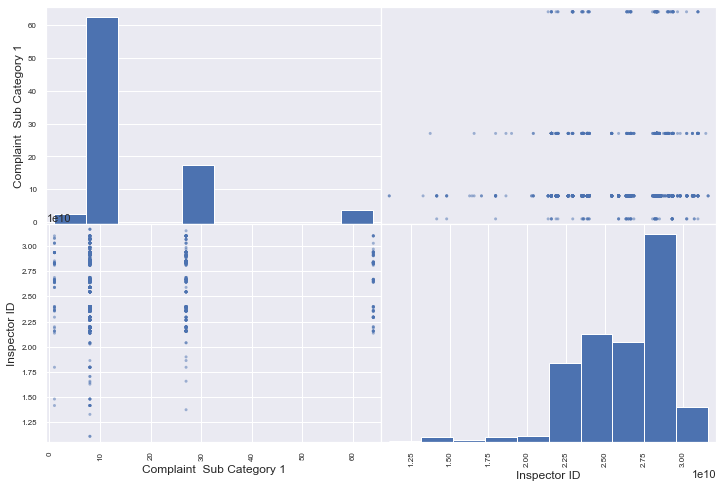

In [173]:
# scatter matrix for the cubed data for Complaint Sub Category and Inspector ID
attributes = ["Complaint  Sub Category 1","Inspector ID"]
scatter_matrix(vios_training[attributes]**3, figsize=(12, 8))
plt.show()

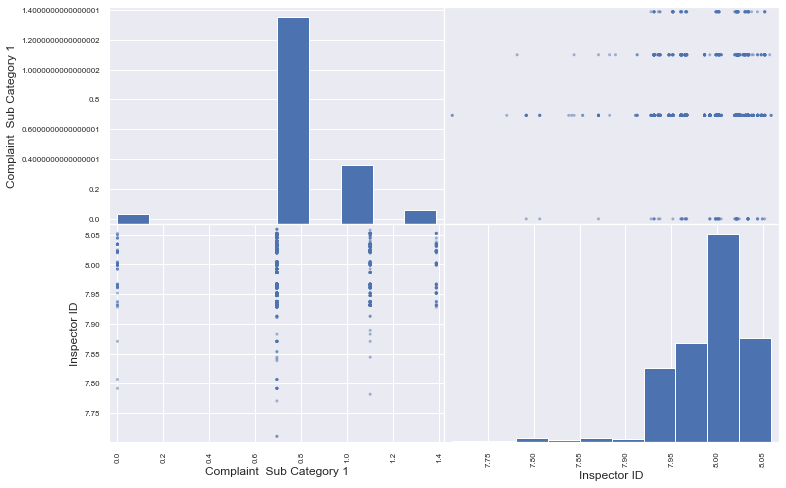

In [174]:
# scatter matrix for the log data for Complaint Sub Category and Inspector ID
attributes = ["Complaint  Sub Category 1","Inspector ID"]
scatter_matrix(np.log(vios_training[attributes]), figsize=(12, 8))
plt.show()

C:\Users\evasi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:49: RuntimeWarning: invalid value encountered in double_scalars
  rdelta_ext = (rmax_ - rmin_) * range_padding / 2.0


ValueError: Axis limits cannot be NaN or Inf

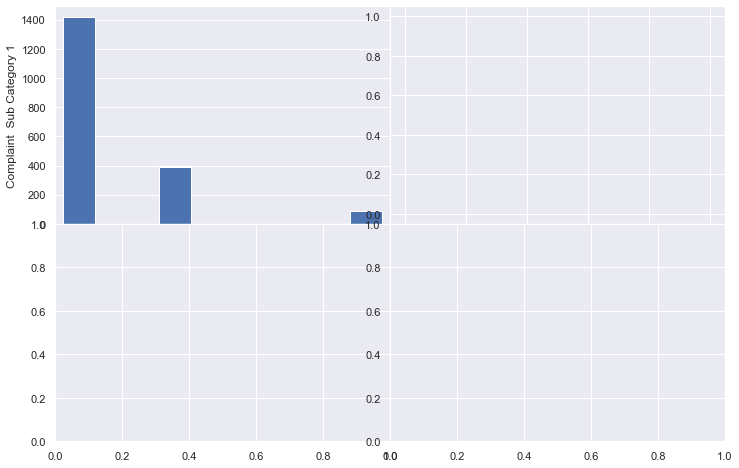

In [175]:
# scatter matrix for the exp data for Complaint Sub Category and Inspector ID
#returns an error
attributes = ["Complaint  Sub Category 1","Inspector ID"]
scatter_matrix(np.exp(vios_training[attributes]), figsize=(12, 8))
plt.show()

In [ ]:
# the transformations and visualizations don't offer any
# information regarding the fields being observed which are
# infraction codes before and after new classification